# K Fold Cross-Validation

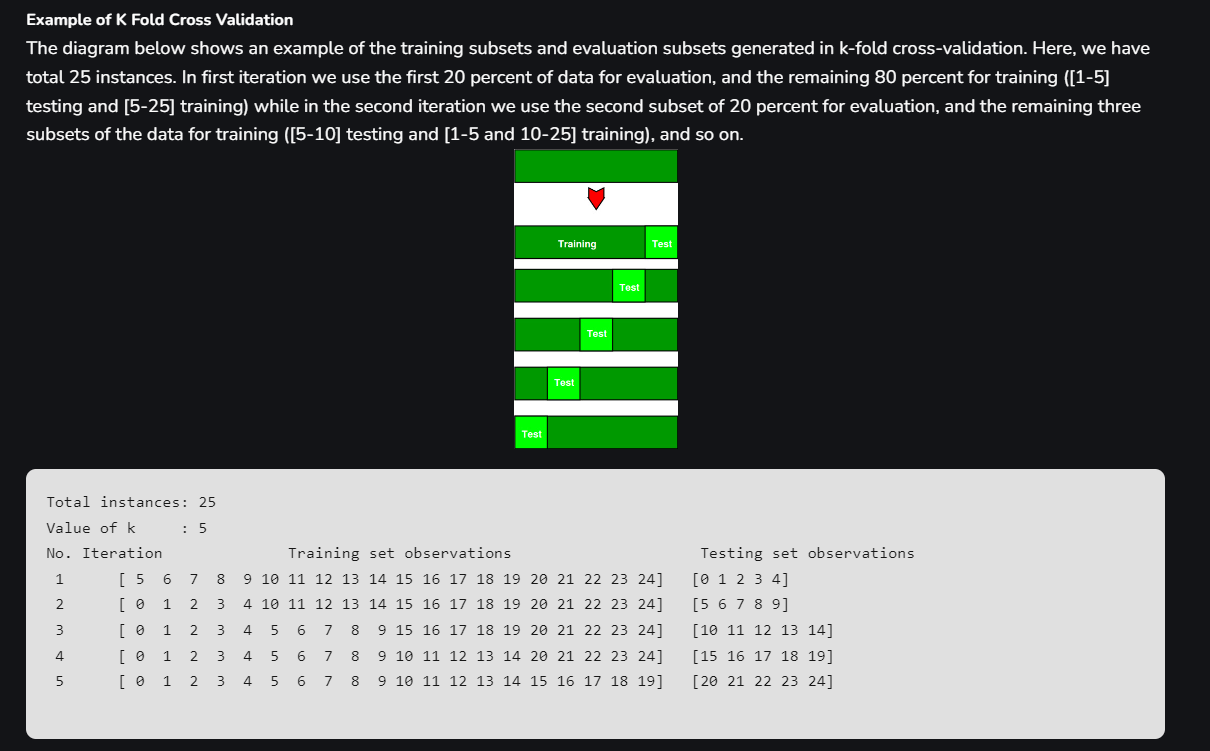

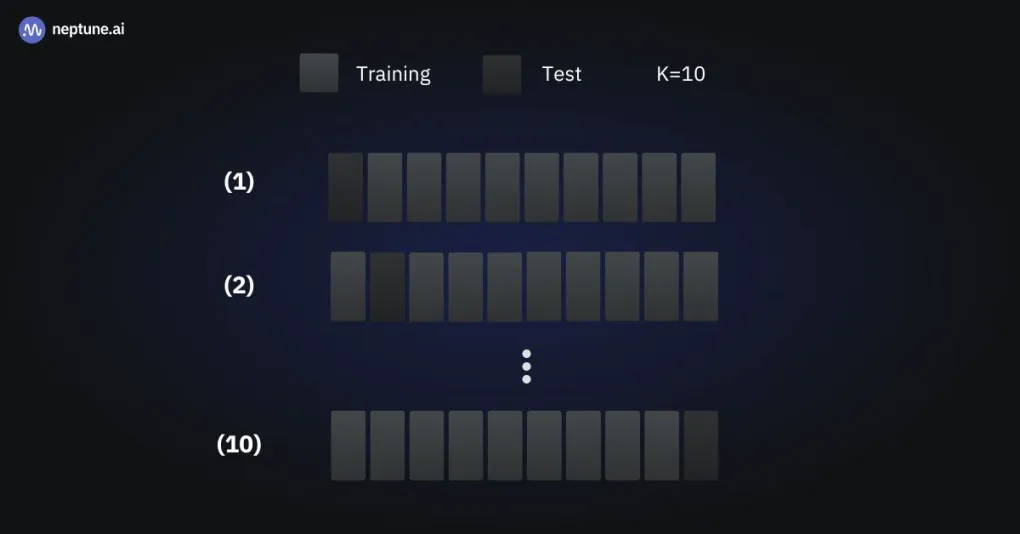

### Step 1: Importing the required libraries

In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris


### Step 2: Loading the datasets

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

### Step 3. Create SVM Classifier

In [4]:
svm_classifier = SVC(kernel='linear')
svm_classifier

SVC(kernel='linear')

### Step 4. Define the number of folds for cross-validation

In [5]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

### Step 5. Permform k-fold cross-validation

In [6]:
cross_val_results = cross_val_score(svm_classifier, X, y, cv=kf, scoring='accuracy')

### Step 6: Evaluation Metrics

In [7]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [1.         1.         0.96666667 0.93333333 0.96666667]
Mean Accuracy: 0.9733333333333334


------------------

## Steps for k-fold cross-validation

1. Pick a number of folds – k. Usually, k is 5 or 10 but you can choose any number which is less than the dataset’s length.
2. Split the dataset into k equal (if possible) parts (they are called folds)
3. Choose k – 1 folds as the training set. The remaining fold will be the test set
4. Train the model on the training set. On each iteration of cross-validation, you must train a new model independently of the model trained on the previous iteration
5. Validate on the test set
6. Save the result of the validation
7. Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
8. To get the final score average the results that you got on step 6.

In [8]:
import numpy as np 
from sklearn.model_selection import KFold

In [9]:
X  = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
kf = KFold(n_splits = 4) # Define the split - into 4 folds
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [2 3 4 5 6 7] Test: [0 1]
Train: [0 1 4 5 6 7] Test: [2 3]
Train: [0 1 2 3 6 7] Test: [4 5]
Train: [0 1 2 3 4 5] Test: [6 7]


--------------------------------------------

## Leave-One-Out Cross-Validation

The algorithm of LpOC technique:

Choose p samples from the dataset which will be the test set
The remaining n – p samples will be the training set
Train the model on the training set. On each iteration, a new model must be trained
Validate on the test set
Save the result of the validation
Repeat steps 2 – 5 Cpn times 
To get the final score average the results that you got on step 5

In [10]:
import numpy as np 
from sklearn.model_selection import LeavePOut
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

lpo = LeavePOut(p=2)

for train_index, test_index in lpo.split(X):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y[test_index]

Train: [2 3] Test: [0 1]
Train: [1 3] Test: [0 2]
Train: [1 2] Test: [0 3]
Train: [0 3] Test: [1 2]
Train: [0 2] Test: [1 3]
Train: [0 1] Test: [2 3]


----------------------------------------------------------------------------------------------------------------------------

## Stratified k-fold cross-validation

It works as follows. Stratified k-Fold splits the dataset on k folds such that each fold contains approximately the same percentage of samples of each target class as the complete set. In the case of regression, Stratified k-Fold makes sure that the mean target value is approximately equal in all the folds.

The algorithm of Stratified k-Fold technique:

1. Pick a number of folds – k
2. Split the dataset into k folds. Each fold must contain approximately the same percentage of samples of each target class as the complete set 
3. Choose k – 1 folds which will be the training set. The remaining fold will be the test set
4. Train the model on the training set. On each iteration a new model must be trained
5. Validate on the test set
6. Save the result of the validation
7. Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
8. To get the final score average the results that you got on step 6.

In [11]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1]) # binary classes
skf = StratifiedKFold(n_splits=2) # Define the split - into 2 folds and shuffle 

for train_index, test_index in skf.split(X, y): 
    print("Train:", train_index, "Test:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [1 3] Test: [0 2]
Train: [0 2] Test: [1 3]


In [12]:
## Next Method 
for train, test in skf.split(X, y): 
    print("%s %s" % (train, test))

[1 3] [0 2]
[0 2] [1 3]


### Repeated k-Fold cross-validation

1.	Pick k – number of times the model will be trained
2.	Pick a number of samples which will be the test set
3.	Split the dataset
4.	Train on the training set. On each iteration of cross-validation, a new model must be trained
5.	Validate on the test set
6.	Save the result of the validation
7.	Repeat steps 3-6 k times
8.	To get the final score average the results that you got on step 6.



In [13]:
import numpy as np 
from sklearn.model_selection import RepeatedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1]) # binary classes
rkf = RepeatedKFold(n_splits=2, n_repeats = 2, random_state=42) # Define the split - into 2 folds and shuffle and repeat twice

for train_index, test_index in rkf.split(X): 
    print("Train:", train_index, "Test:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [0 2] Test: [1 3]
Train: [1 3] Test: [0 2]
Train: [0 2] Test: [1 3]
Train: [1 3] Test: [0 2]


## Nested K-Fold Cross-Validation

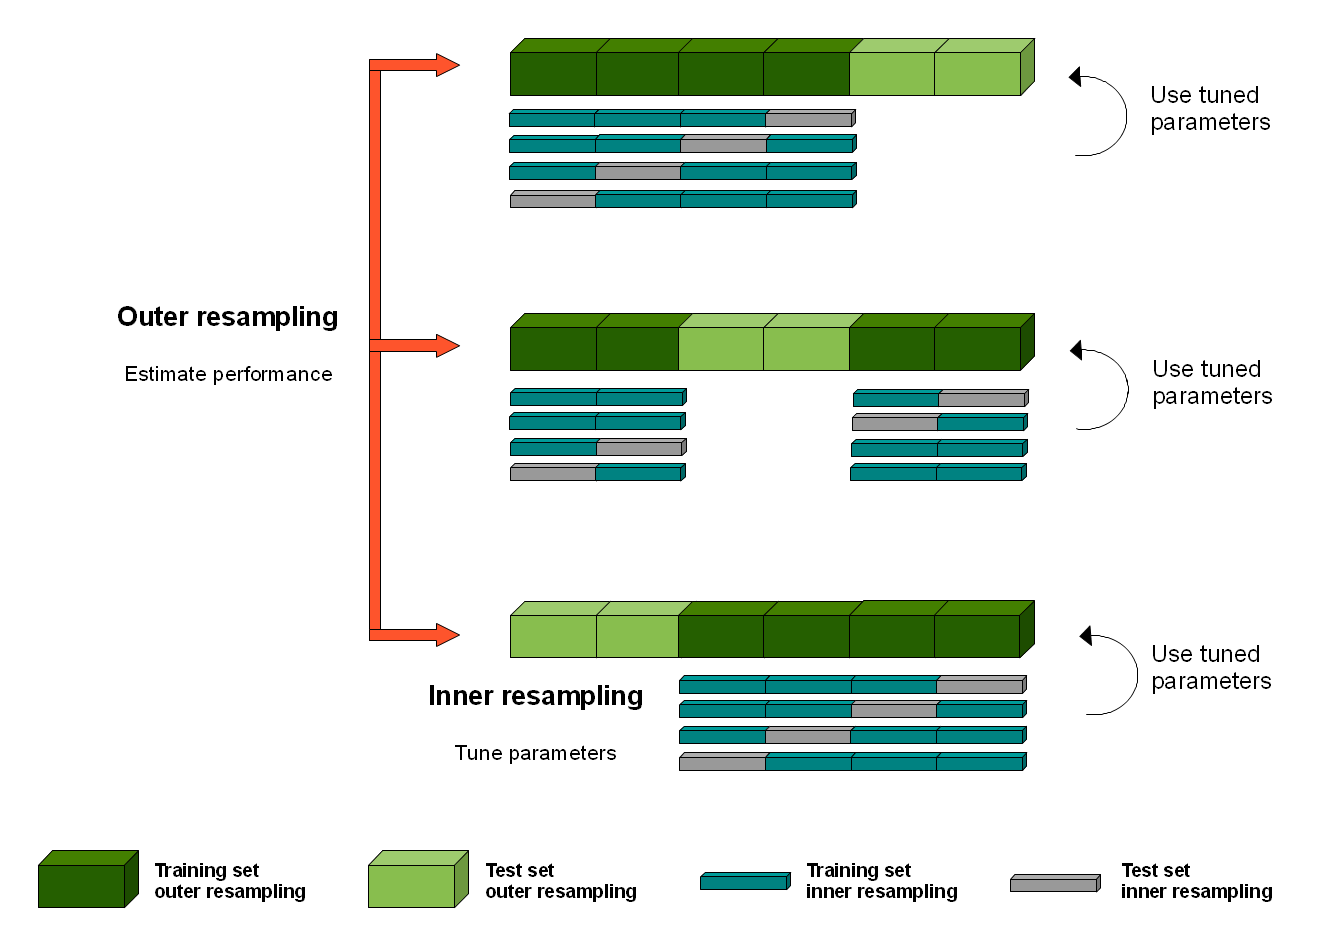

1.	Define set of hyper-parameter combinations, C, for current model. If model has no hyper-parameters, C is the empty set.
2.	Divide data into K folds with approximately equal distribution of cases and controls.
3.	(outer loop) For fold k, in the K folds:
•	Set fold k, as the test set.
•	Perform automated feature selection on the remaining K-1 folds.
•	For parameter combination c in C:
•	(inner loop) For fold k, in the remaining K-1 folds:
•	Set fold k, as the validation set.
•	Train model on remaining K-2 folds.
•	Evaluate model performance on fold k.
•	Calculate average performance over K-2 folds for parameter combination c.
•	Train model on K-1 folds using hyper-parameter combination that yielded best average performance over all steps of the inner loop.
•	 Evaluate model performance on fold k.
4.	Calculate average performance over K folds.

